In [1]:
import pandas as pd
from dython.nominal import associations
from ydata_profiling import ProfileReport

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/finalData.csv")

# Análise Exploratória de Dados

Primeiro, é importante observarmos a composição do dataset, para entendermos melhor o que estamos analisando. O Profiling é uma ferramenta que nos ajuda a entender a composição do dataset, e nos dá insights sobre o que podemos fazer para melhorar a qualidade dos dados. Em particular, estamos interessados em saber se há valores faltantes, se há outliers, e se há correlação entre as variáveis.

Inicialmente, vamos verificar os percentuais de candidatos por características socioeconômicas.

In [4]:
profile = ProfileReport(df, title="EDA - Perfil dos candidatos")

In [5]:
profile.to_file("EDA-Candidates-Profile.html")

In [6]:
profile.to_notebook_iframe()

Vamos observar a correlação entre as variáveis do dataset, pensando principalmente na variável target (no caso, se o indivíduo foi eleito ou não).

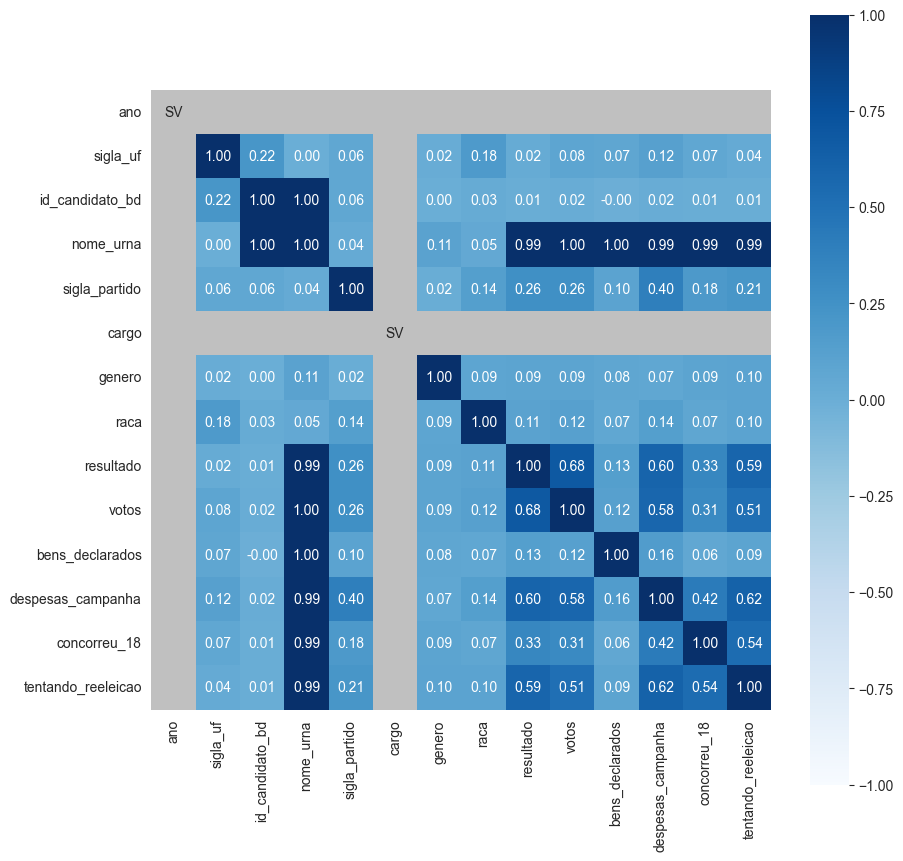

,ano,sigla_uf,id_candidato_bd,nome_urna,sigla_partido,cargo,genero,raca,resultado,votos,bens_declarados,despesas_campanha,concorreu_18,tentando_reeleicao
ano,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sigla_uf,0.000000,1.000000,0.215503,0.000000,0.064785,0.000000,0.019422,0.175015,0.024448,0.084162,0.070640,0.124640,0.067240,0.037466
id_candidato_bd,0.000000,0.215503,1.000000,0.995258,0.064770,0.000000,0.003064,0.030065,0.013243,0.020158,-0.003971,0.016114,0.011224,0.010056
nome_urna,0.000000,0.000000,0.995258,1.000000,0.038028,0.000000,0.105543,0.047202,0.994322,0.996628,0.999433,0.994977,0.994777,0.993578
sigla_partido,0.000000,0.064785,0.064770,0.038028,1.000000,0.000000,0.015416,0.140103,0.261859,0.263069,0.097387,0.395310,0.180173,0.212601
cargo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genero,0.000000,0.019422,0.003064,0.105543,0.015416,0.000000,1.000000,0.085764,0.086814,0.087798,0.076076,0.066444,0.092573,0.098358
raca,0.000000,0.175015,0.030065,0.047202,0.140103,0.000000,0.085764,1.000000,0.106139,0.123000,0.069189,0.136190,0.071020,0.099433
resultado,0.000000,0.024448,0.013243,0.994322,0.261859,0.000000,0.086814,0.106139,1.000000,0.684493,0.133524,0.596459,0.328606,0.586271
votos,0.000000,0.084162,0.020158,0.996628,0.263069,0.000000,0.087798,0.123000,0.684493,1.000000,0.119157,0.578325,0.305868,0.512471


In [7]:
corr = associations(df, filename=None, figsize=(10, 10), fmt='.2f', cmap='Blues')
corr['corr'].style.background_gradient(cmap='Blues')

In [54]:
despesas_por_partido = df.groupby('sigla_partido')['despesas_campanha'].mean().reset_index().sort_values(by='despesas_campanha', ascending=False)

In [55]:
fig = px.bar(despesas_por_partido,
             x = 'sigla_partido',
             y = 'despesas_campanha',
             color_discrete_sequence=['firebrick'],
             labels = {'sigla_partido': 'Partido', 'despesas_campanha': 'Despesa média'})

fig.update_yaxes(linecolor = 'black', gridcolor = 'white', mirror = True, showticklabels = True)
fig.update_xaxes(linecolor = 'black', gridcolor = 'white', mirror = True, showticklabels = True)
fig.update_layout(width = 700, height = 500, plot_bgcolor = 'white', paper_bgcolor = 'white',
                  title = {'text': 'Despesa média de campanha dos candidatos, por partido', 'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'})

# set title color to black
fig.update_layout(title_font_color="black")

# set labels color to black
fig.update_xaxes(tickfont_color="black")
fig.update_yaxes(tickfont_color="black")

# set legend title color to black
fig.update_layout(legend_title_font_color="black")

# set xlabel color to black
fig.update_xaxes(title_font_color="black")

# set ylabel color to black
fig.update_yaxes(title_font_color="black")

fig.show()

fig.write_image("images/despesas_por_partido.png")

In [57]:
# plot a scatterplot of number of votes vs campaign expenses

# standardize despesas_campanha
df['despesas_campanha_std'] = (df['despesas_campanha'] - df['despesas_campanha'].mean()) / df['despesas_campanha'].std()
df['resultado'] = df['resultado'].astype(str)

fig = px.scatter(df.query("votos < 400000"), 
                 x="despesas_campanha", 
                 y="votos", 
                 color="resultado",
                 opacity=0.8,
                 color_discrete_sequence=['firebrick', 'royalblue'],
                 labels = {'despesas_campanha': 'Despesa de campanha', 'votos': 'Número de votos', 'resultado': 'Resultado'})

fig.update_yaxes(linecolor = 'black', gridcolor = 'white', mirror = True, showticklabels = True)
fig.update_xaxes(linecolor = 'black', gridcolor = 'white', mirror = True, showticklabels = True)
fig.update_layout(width = 600, height = 500, plot_bgcolor = 'white', paper_bgcolor = 'white',
                  title = {'text': 'Despesa de campanha x Número de votos', 'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top'})

# set title color to black
fig.update_layout(title_font_color="black")

# set labels color to black
fig.update_xaxes(tickfont_color="black")
fig.update_yaxes(tickfont_color="black")

# set legend title color to black
fig.update_layout(legend_title_font_color="black")

# set xlabel color to black
fig.update_xaxes(title_font_color="black")

# set ylabel color to black
fig.update_yaxes(title_font_color="black")

fig.show()

fig.write_image("images/despesas_campanha_x_votos.png")